In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [53]:
clusters_count = [2, 4, 6, 8, 10 ]
kmeans = KMeans(random_state = 4)

In [54]:
heart_data = pd.read_csv('pca_hd.csv', sep=',')
auto_data = pd.read_csv('pca_mpg.csv', sep=',')

In [55]:
# heart_features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
# auto_features = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']

In [56]:
heart_features = ['0','1','2','3','4','5','6']
auto_features = ['0', '1', '2', '3','4']
x_heart = heart_data[heart_features]  
y_heart = heart_data.target
x_auto = auto_data[auto_features] 
y_auto = auto_data.mpg


In [57]:
#for heart data

plt.figure()

plotx = []
ploty = []
plot_dict = {}

<Figure size 640x480 with 0 Axes>

In [58]:
for count in clusters_count:
    kmeans.set_params(n_clusters = count)
    kmeans.fit(x_heart)
    labels = kmeans.predict(x_heart)

    silhouette_avg = silhouette_score(x_heart, labels)
    
    plotx.append(count)
    ploty.append(silhouette_avg)


    plot_dict[count] = silhouette_avg


/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[0.21988399583733395, 0.17174588886274308, 0.16702304780007382, 0.157128522606441, 0.13802083504461102]


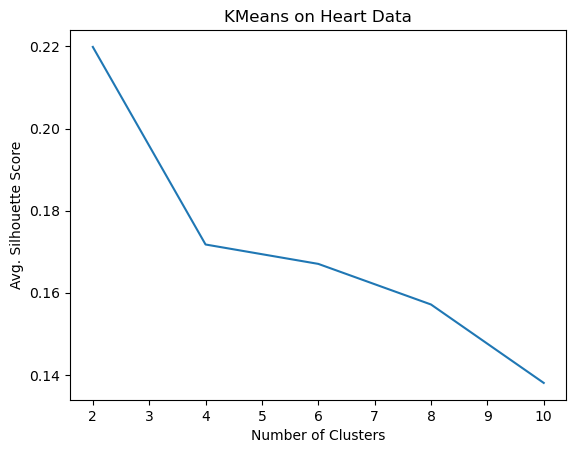

In [59]:
plt.figure()
plt.title('KMeans on Heart Data')
plt.plot(plotx,ploty)
plt.xlabel('Number of Clusters')
plt.ylabel('Avg. Silhouette Score')
print(ploty)

In [60]:
#for mpg data

plt.figure()

plotx = []
ploty = []
plot_dict = {}

<Figure size 640x480 with 0 Axes>

In [61]:
for count in clusters_count:
    kmeans.set_params(n_clusters = count)
    kmeans.fit(x_auto)
    labels = kmeans.predict(x_auto)

    silhouette_avg = silhouette_score(x_auto, labels)
    
    plotx.append(count)
    ploty.append(silhouette_avg)


    plot_dict[count] = silhouette_avg

/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

Text(0, 0.5, 'Avg. Silhouette Score')

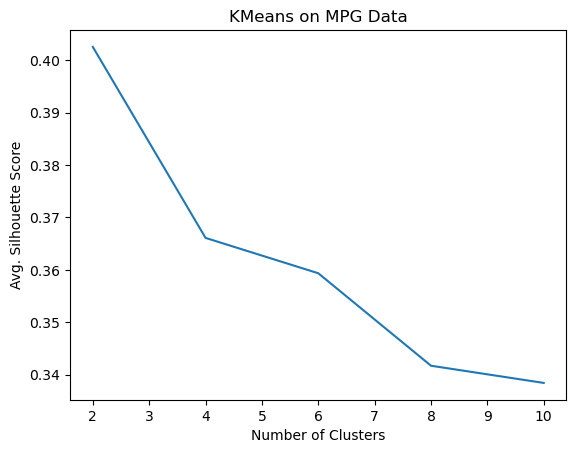

In [62]:
plt.figure()
plt.title('KMeans on MPG Data')
plt.plot(plotx,ploty)
plt.xlabel('Number of Clusters')
plt.ylabel('Avg. Silhouette Score')

In [63]:
# Expectation Maximum
gaus = GaussianMixture(random_state = 4)


In [64]:
# heart data
plt.figure()

plotx = []
ploty = []
plot_dict = {}

<Figure size 640x480 with 0 Axes>

In [65]:
for count in clusters_count:
    gaus.set_params(n_components = count)
    gaus.fit(x_heart)
    labels = gaus.predict(x_heart)

    silhouette_avg = silhouette_score(x_heart, labels)
    plotx.append(count)
    ploty.append(silhouette_avg)
    plot_dict[count] = silhouette_avg


Text(0, 0.5, 'Avg. Silhouette Score')

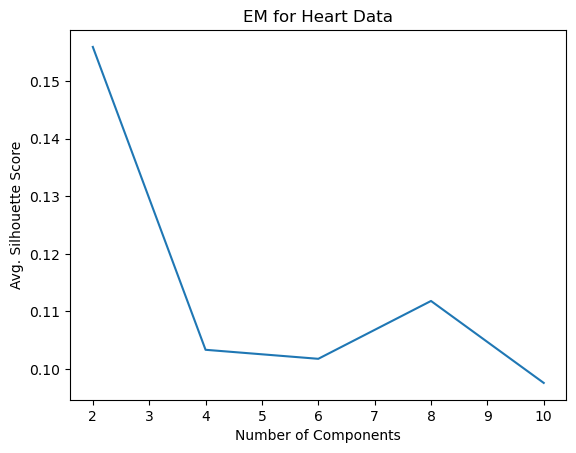

In [66]:
plt.figure()
plt.title('EM for Heart Data')
plt.plot(plotx,ploty)
plt.xlabel('Number of Components')
plt.ylabel('Avg. Silhouette Score')

In [67]:
# for mpg data
plt.figure()

plotx = []
ploty = []
plot_dict = {}

<Figure size 640x480 with 0 Axes>

In [68]:
for count in clusters_count:
    gaus.set_params(n_components = count)
    gaus.fit(x_auto)
    labels = gaus.predict(x_auto)

    silhouette_avg = silhouette_score(x_auto, labels)
    plotx.append(count)
    ploty.append(silhouette_avg)
    plot_dict[count] = silhouette_avg

Text(0, 0.5, 'Avg. Silhouette Score')

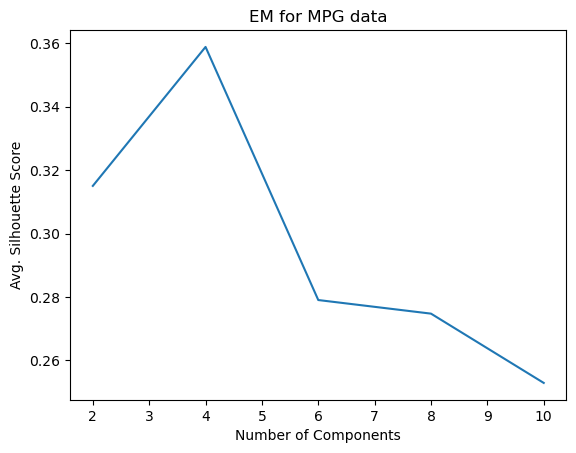

In [69]:
plt.figure()
plt.title('EM for MPG data')
plt.plot(plotx,ploty)
plt.xlabel('Number of Components')
plt.ylabel('Avg. Silhouette Score')